# Assignment 1: K-Means and the Trajectories of Cluster Centers

By typing my name, I confirm that the code, experiments, results, and discussions are all written by me, except for the code provided by the instructor.  

*Ryan Blocker*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#60-points:-Code-Requirements" data-toc-modified-id="60-points:-Code-Requirements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font color="red"><strong>60 points</strong></font>: Code Requirements</a></span></li><li><span><a href="#40-points:-Experiment-and-Discussion-Requirements" data-toc-modified-id="40-points:-Experiment-and-Discussion-Requirements-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><font color="red"><strong>40 points</strong></font>: Experiment and Discussion Requirements</a></span></li></ul></div>

## Summary

In class we developed our implementation of k-means and applied it to the Old Faithful data.

In this assignment, you will investigate how the k-means algorithm adjusts the cluster centers by plotting the trajectory of each center superimposed on the scatter plot of the data.

##  <font color="red">**60 points**</font>: Code Requirements

Start with the k-means implementation from lecture notes [05 Clustering](https://nbviewer.org/url/www.cs.colostate.edu/~anderson/cs345/notebooks/05%20Clustering.ipynb).  Copy and paste it in the next code cell, along with the `calc_J` function.  Don't forget to start with 

    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd

**<font color="purple">Edited Feb. 2:</font>** Now modify the k-means function to keep track of the cluster centers for each iteration in a local variable named `centers_trajectories`.  The variable `centers_trajectories` must be a `numpy.array` of shape $(n+1, k, 2)$ where $n$ is the number of iterations, $k$ is the number of cluster centers, and 2 is the dimension of your data.  Include the initial centers as the first entry in `centers_trajectories`, which results in having $n+1$ centers stored in `centers_trajectories`. Since we are using the Old Faithful data, the data is two-dimensional. Your `kmeans` function must then return `centers_trajectories`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#efine data as "old Faithful" as OFdata
pd.read_csv('faithful.csv')
datadf = pd.read_csv('faithful.csv', delimiter=',', usecols=(1, 2))
OFdata = datadf.values

In [2]:
## calc_J and your modified kmeans functions

def kmeans(data, k = 2, n_iterations = 5):
    
    J = []

    #Initial Centers
    centers = data[np.random.choice(range(data.shape[0]), k, replace=False), :]
    centers_trajectories = np.empty((n_iterations+1, k, 2))
    centers_trajectories[0, :] = centers
    
    #Iteration
    for iteration in range(n_iterations):
        
        squared_distances = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
        closest = np.argmin(squared_distances, axis=0)
        
        J.append(calc_J(squared_distances))
        
        
        
        for i in range(k):
            centers[i, :] = data[closest == i, :].mean(axis=0)  
            centers_trajectories[iteration+1, :] = centers
        
    squared_distances = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
    J.append(calc_J(squared_distances))
    
    return centers, J, closest, centers_trajectories

def calc_J(squared_distances):
    return np.sum(np.min(squared_distances, axis=0))

Here is a simple test. You should get the same answer as shown here.

In [3]:
data = np.array([[1.1, 2.2],
                 [2.3, 1.5],
                 [1.9, 2.1],
                 [5.6, 4.6],
                 [5.1, 5.5],
                 [4.0, 6.0]])
data

array([[1.1, 2.2],
       [2.3, 1.5],
       [1.9, 2.1],
       [5.6, 4.6],
       [5.1, 5.5],
       [4. , 6. ]])

We will set the seed of the random number generator so we all get the same result.

In [4]:
#rng = np.random.default_rng(seed=42)
np.random.seed(42)

centers, J, closest, centers_trajectories = kmeans(data, k=2, n_iterations=5)
centers

array([[1.76666667, 1.93333333],
       [4.9       , 5.36666667]])

In [5]:
J

[67.71000000000001, 32.676249999999996, 18.80666666666667, 3.38, 3.38, 3.38]

In [6]:
centers_trajectories.shape

(6, 2, 2)

In [7]:
centers_trajectories

array([[[1.1       , 2.2       ],
        [2.3       , 1.5       ]],

       [[2.55      , 4.1       ],
        [3.725     , 3.425     ]],

       [[2.33333333, 3.43333333],
        [4.33333333, 3.86666667]],

       [[1.76666667, 1.93333333],
        [4.9       , 5.36666667]],

       [[1.76666667, 1.93333333],
        [4.9       , 5.36666667]],

       [[1.76666667, 1.93333333],
        [4.9       , 5.36666667]]])

**<font color="purple">Edited Feb. 2:</font>** Now define a function named `plot_kmeans` that accepts as arguments `data`, `closest` and `centers_trajectories` and plots the scatter plot of `data` and the `centers_trajectories`.

In [8]:
# plot_kmeans function defined here
def plot_kmeans(data, closest, centers_trajectories):
   
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], s=25)
    plt.plot(centers_trajectories[:,:,0], centers_trajectories[:,:,1], linewidth=3)
    plt.scatter(centers[:, 0], centers[:, 1], s=200, c="black", marker='d')


Here is an example of the plots that your function should produce.

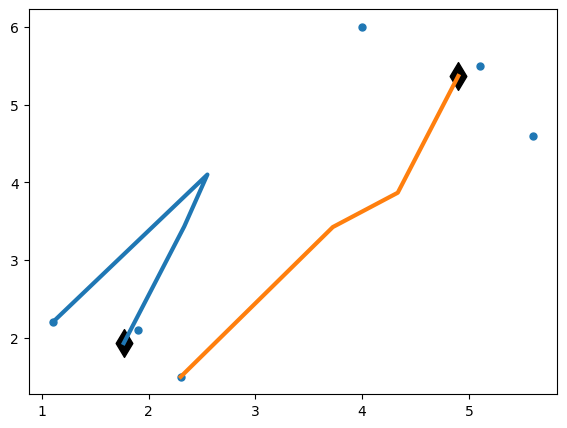

In [9]:
plot_kmeans(data, closest, centers_trajectories)

##  <font color="red">**40 points**</font>: Experiment and Discussion Requirements  



Add markdown and code cells below this cell to complete each of the following steps.

1. Run kmeans on the Old Faithful data with $k = 2$ three times, plotting the data and the center trajectories each time.
2. After all three runs, add a markdown cell describing the center trajectories.  Discuss how and why they differ among the three runs.
3. Run kmeans on the Old Faithful data with $k = 4$ three times, plotting the data and the center trajectories each time.
4. After all three runs, add a markdown cell describing the center trajectories.  Discuss how and why they differ among the three runs.
5. At the end of your notebook, add one more markdown cell and describe the parts of this assignment that were difficult for you.

In [10]:
centers, J, closest, centers_trajectories = kmeans(OFdata, k=2, n_iterations=5)

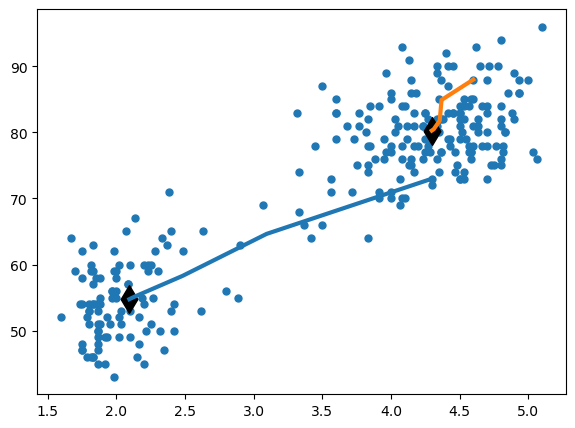

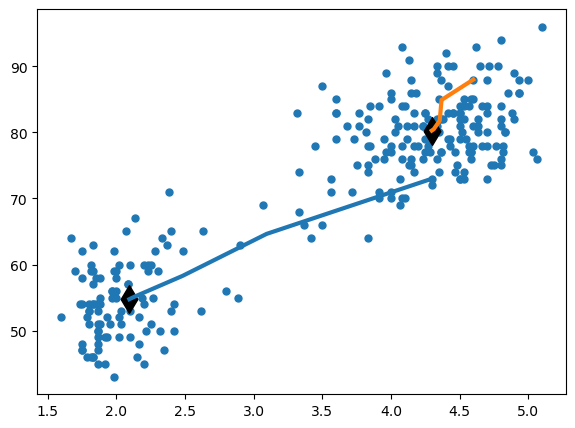

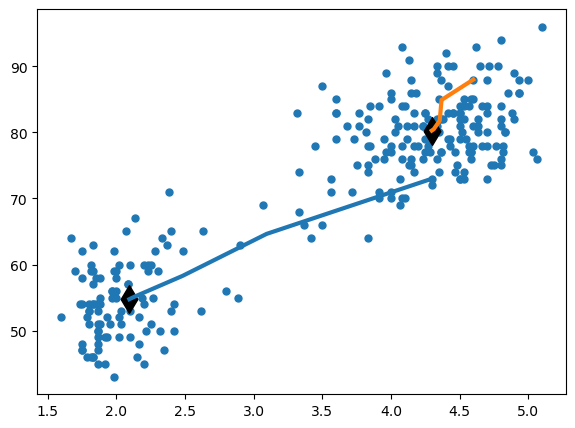

In [11]:
for run in range(3):
    plot_kmeans(OFdata, closest, centers_trajectories)

<h2>2. (Run 1) - In these trials we ran the "kmeans" algorithm with k=2 and with three 5 iterations 3 times. Over the course of these three tests the data describes that the two average geyser water relase times are at either (Interval: 55min, Duration: 2.1sec) or (Interval: 80min, Duration: 4.25sec). This means that both of these cluster centers </h2> 

In [12]:
centers, J, closest, centers_trajectories = kmeans(OFdata, k=4, n_iterations=5)

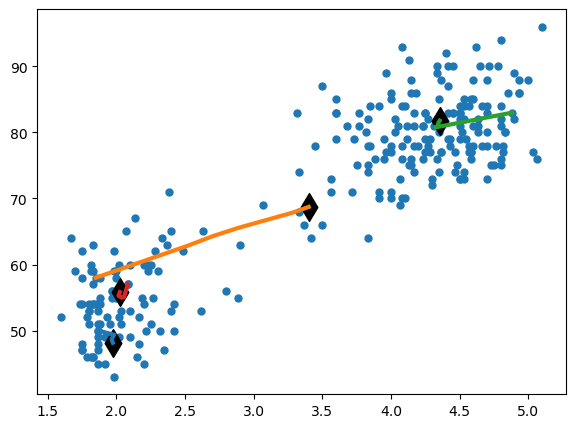

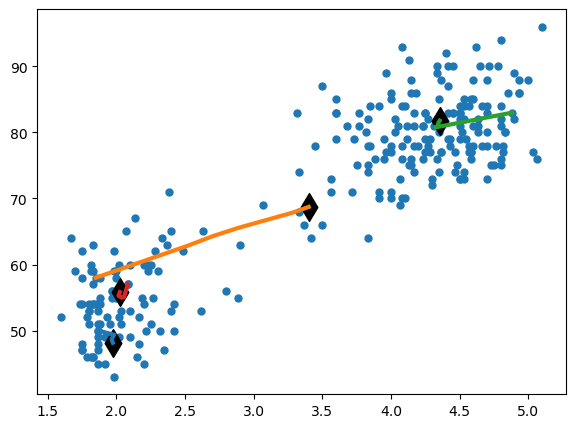

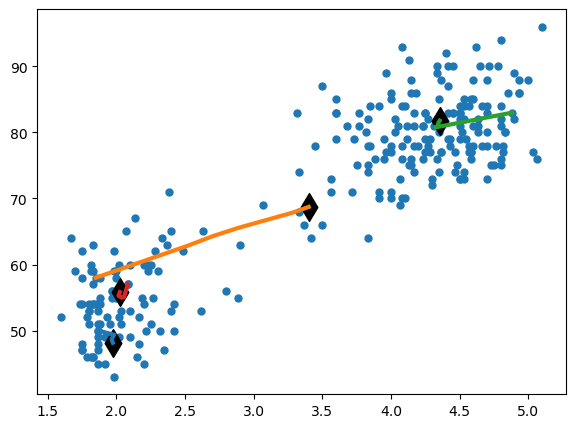

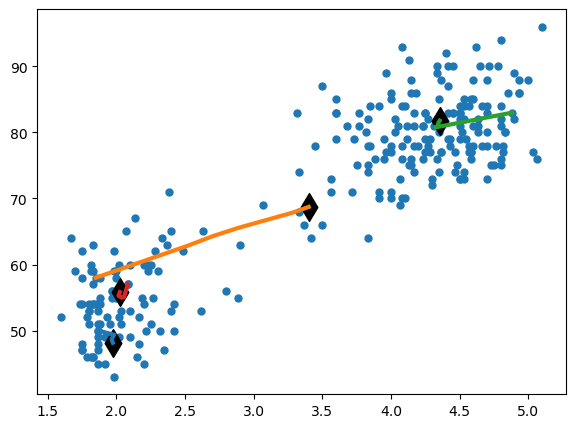

In [13]:
for run in range(4):
    plot_kmeans(OFdata, closest, centers_trajectories)

<h2> 4. (Run 2) - In these trials we ran the "kmeans" algorithm with k=4 and with three 5 iterations 3 times. In this trial we can see that we have 4 clusters and interestingly enough we have a cluster center in the center at around (Interval: 68min, Duration: 3.4sec). This makes sense because the more cluster centers we have the more centers are going to follow the trend between the max and min geyser data points. I also ran this trial with 50 clusters and the center-points follow the path of cluster data in an upward trend. </h2>

<h2> 5. This assignment was challanging, I really struggles to figure out my kmeans function. The hardest part was figuring out if my graphs were displaying properly and getting the center_trajectories to the right values</h2>